In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics.pairwise import cosine_similarity
from skimage.feature import hog, daisy
from skimage import data, color, exposure
from scipy.spatial.distance import euclidean

In [71]:
#loading the image

query_image = cv2.imread(r"C:\Users\Arunprasath Manickam\Desktop\cv\upload_folder\query_image.png")
query_image = cv2.cvtColor( query_image , cv2.COLOR_BGR2RGB )

Text(0.5, 1.0, 'Original Image')

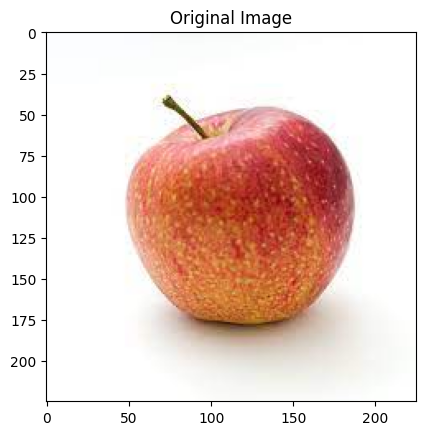

In [72]:
#displaying the original image

plt.imshow(query_image)
plt.title("Original Image")

Text(0.5, 1.0, 'Resized Image')

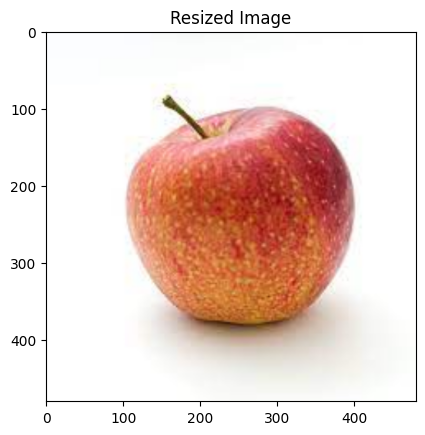

In [73]:
#Image resizing
def resize_image(query_image):
    return cv2.resize( query_image , ( 480 , 480 ))

query_image = resize_image(query_image)
plt.imshow(query_image)
plt.title("Resized Image")

In [74]:
#gray scale conversion

def grayScaleConversion(query_image):
    return cv2.cvtColor( query_image , cv2.COLOR_RGB2GRAY )

query_image = grayScaleConversion(query_image)

Text(0.5, 1.0, 'Gray Scale Image')

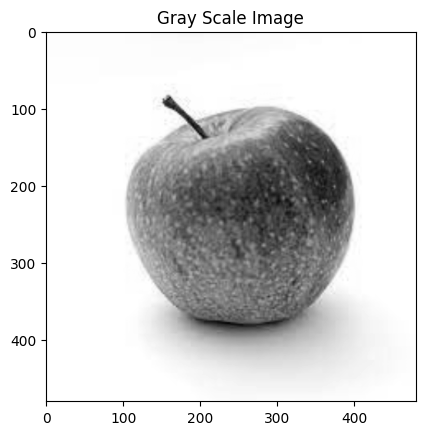

In [75]:
#displaying the gray scale image 

plt.imshow(query_image , cmap="gray")
plt.title("Gray Scale Image")

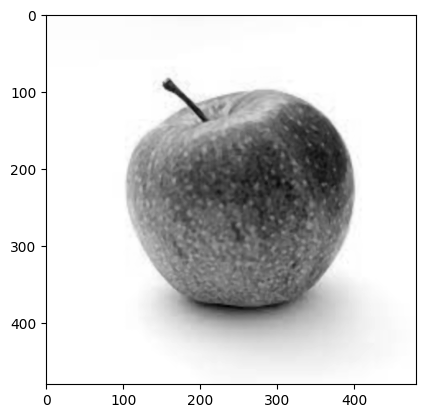

In [76]:
#Median filter

def medianFilter( query_image ):
    return cv2.medianBlur( query_image , 3 ) 

query_image = medianFilter( query_image )
plt.imshow(query_image , cmap="gray" )


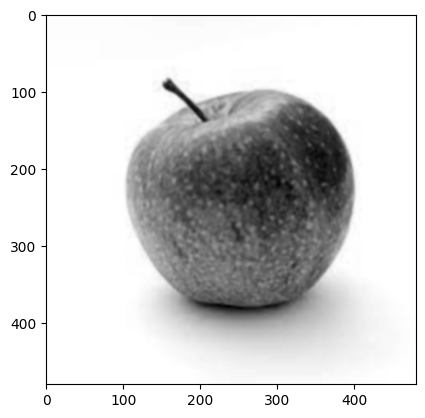

In [77]:
#Gaussian Blur

def gaussianBlur( query_image ):
    return cv2.GaussianBlur(query_image, (5, 5), 0)

query_image = gaussianBlur( query_image )
plt.imshow(query_image , cmap='gray')

Texture

In [78]:
#Gabor filter

def gabor_filter( query_image ):
    kernel_size = 3
    sigma = 3
    thetha = 1*(np.pi / 4)
    lambd = 5
    gamma = 0.25
    psi = 0

    kernel = cv2.getGaborKernel((kernel_size,kernel_size) , sigma , thetha , lambd , gamma , psi , ktype = cv2.CV_32F)

    query_image = cv2.filter2D( query_image , cv2.CV_32F ,kernel )

    return query_image.flatten()

In [79]:
query_image_feature = gabor_filter(query_image)

In [80]:
database_path = r'databases'

database_image_features = []

for filename in os.listdir(database_path):
    database_img = os.path.join(database_path,filename)
    database_img = cv2.imread( database_img )
    database_img = cv2.cvtColor(database_img , cv2.COLOR_BGR2RGB)
    
    #resizing the database image
    database_img = resize_image(database_img)

    #gray scale conversion
    database_img = grayScaleConversion(database_img)

    #applying median filter
    database_img = medianFilter(database_img)

    #applying gaussian blur
    database_img = gaussianBlur(database_img)

    #applying gabor filter
    database_image_features.append( gabor_filter(database_img) )

In [81]:
#applying the cosine similarity between the query image and the database images

similar_image = cosine_similarity( [query_image_feature] , database_image_features )[0]
print(similar_image)

[0.95731264 0.9376783  0.9999042  0.9794696  0.97986686 0.83396465
 0.831035   0.8172593  0.836819   0.92129654 0.74369377 0.73733455
 0.9595741  0.828045   0.8528463  0.84694105 0.85999763 0.8853586
 0.8832348  0.9185606  0.8394239  0.89087576 0.899956   0.76636875
 0.85533106 0.8924585  0.8687385  0.903311   0.8622104  0.8214639
 0.8462092  0.9695496  0.77189827 0.7959325  0.9391784  0.8763996
 0.5945804  0.94516027 0.94683164 0.7913696  0.9051428  0.80875796
 0.8952161  0.94583774 0.8974367  0.9036826  0.8739381  0.7858184
 0.9178789  0.9229989  0.42623645 0.49450165 0.43457037 0.82710004
 0.8158793  0.9315953  0.90057516 0.9194638  0.88699275 0.90321153
 0.7393752  0.90414554 0.7598532  0.9195058  0.7981614  0.87026954
 0.8168762  0.93965167 0.8749808  0.88558584 0.86930317 0.87560666
 0.87560666 0.930039   0.9035912 ]


In [82]:
#Applying threshold

threshold = 0.5
index = np.argsort(similar_image)[::-1]

thresholded_similar_image_index = np.where( similar_image[index] >= threshold )[0]

In [83]:
#selecting the top 3

top_n_results = 3
top_index = index[ thresholded_similar_image_index[ :top_n_results] ]

top_index

array([2, 4, 3], dtype=int64)

In [84]:
#Retrieving the top n index image filename

top_image_filenames = [ os.listdir(database_path)[i] for i in top_index]
top_image_filenames

['apple3.png', 'apple5.png', 'apple4.png']

Similar image found are


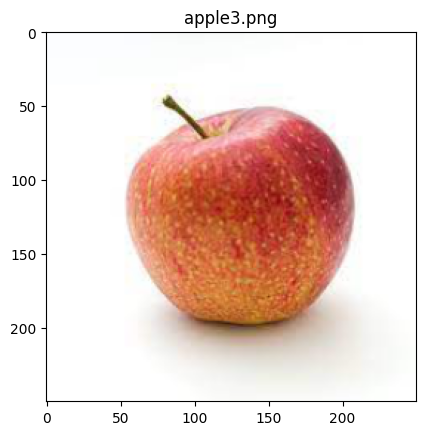

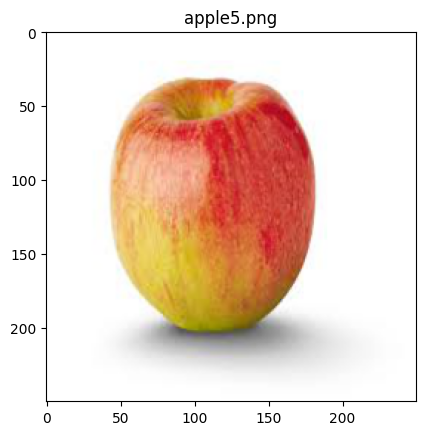

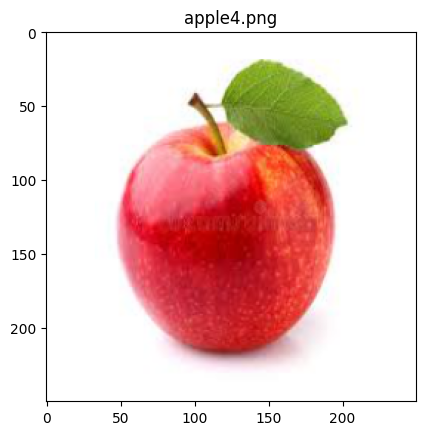

In [85]:
#displaying the similar images

print("Similar image found are")

for index , filename in enumerate(top_image_filenames):
    
    image_path = os.path.join( database_path , filename )

    image = cv2.imread( image_path )
    image = cv2.cvtColor( image , cv2.COLOR_BGR2RGB )
    image = cv2.resize(image , (250,250))
    
    plt.title(filename)
    plt.imshow(image)
    plt.show()

COLOR

In [86]:
#loading image
query_image = cv2.imread(r"C:\Users\Arunprasath Manickam\Desktop\cv\upload_folder\query_image.png")
query_image = cv2.cvtColor( query_image , cv2.COLOR_BGR2RGB )

#resizing the image
query_image = resize_image(query_image)

#histogram
query_hist = cv2.calcHist([query_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])

#normalization
query_hist = cv2.normalize(query_hist, query_hist).flatten()


In [87]:
database_path = r'databases'

database_image_features = []

for filename in os.listdir(database_path):
    
    database_img = os.path.join(database_path,filename)
    
    database_img = cv2.imread( database_img )
    database_img = cv2.cvtColor(database_img , cv2.COLOR_BGR2RGB)
    
    #resizing the database image
    database_img = resize_image(database_img)


    #histogram calculation
    database_img_histogram = cv2.calcHist([database_img], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])

    #normalization
    database_img_histogram = cv2.normalize( database_img_histogram , database_img_histogram ).flatten()

    #finding the similarity score
    similarity_score = np.sum(np.minimum(query_hist, database_img_histogram))

    #applying similarity score
    database_image_features.append( similarity_score )

In [88]:
top_index = np.argsort(database_image_features)[::-1][:3]
top_index

array([2, 4, 0], dtype=int64)

In [89]:
#Retrieving the top n index image filename

top_image_filenames = [ os.listdir(database_path)[i] for i in top_index]
top_image_filenames

['apple3.png', 'apple5.png', 'apple1.png']

Similar image found are


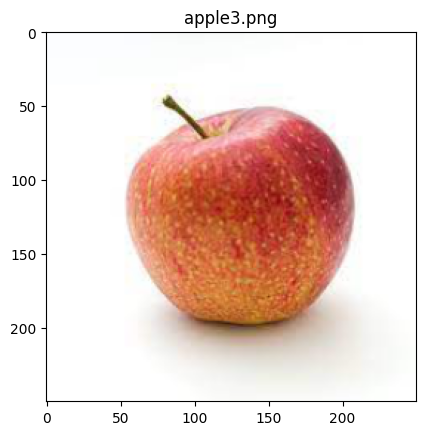

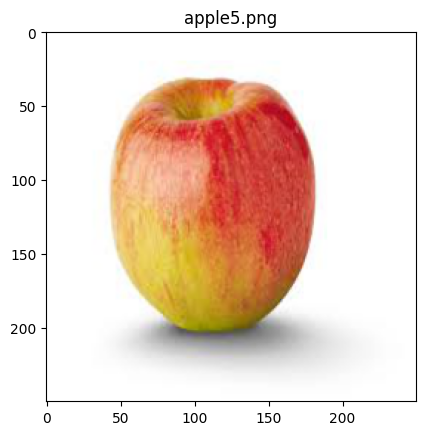

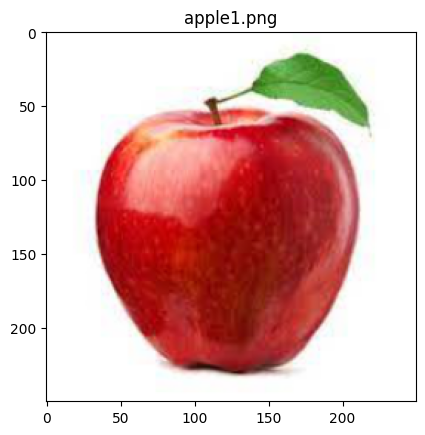

In [90]:
#displaying the similar images

print("Similar image found are")

for index , filename in enumerate(top_image_filenames):
    
    image_path = os.path.join( database_path , filename )

    image = cv2.imread( image_path )
    image = cv2.cvtColor( image , cv2.COLOR_BGR2RGB )
    image = cv2.resize(image , (250,250))
    
    plt.title(filename)
    plt.imshow(image)
    plt.show()

SHAPE

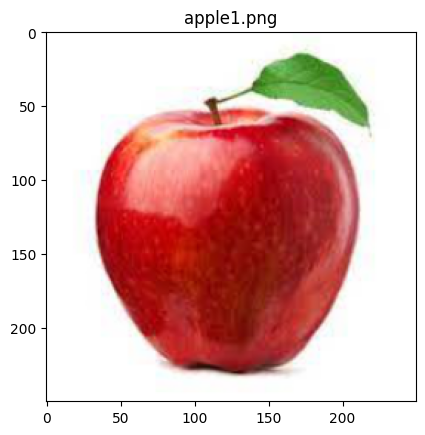

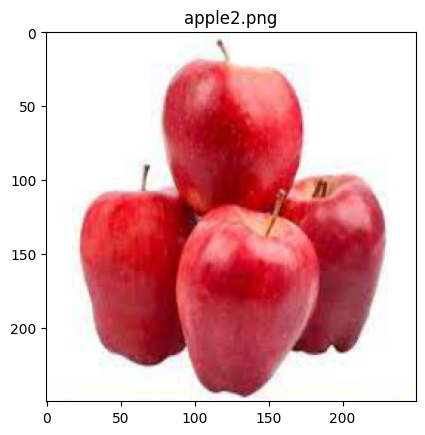

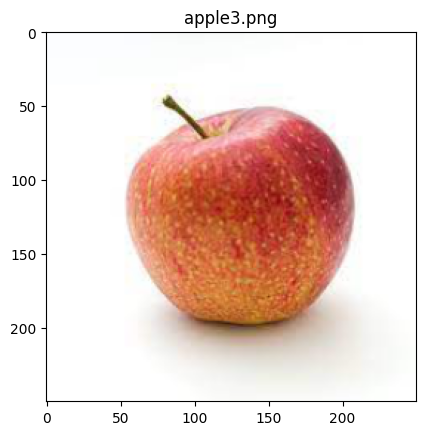

In [91]:
# define the path to the database
db_path = r"C:\Users\Arunprasath Manickam\Desktop\cv\databases/"

# define the query image path
query_path = r"C:\Users\Arunprasath Manickam\Desktop\cv\upload_folder\query_image.png"


# read the query image
query_img = cv2.imread(query_path)

# convert the query image to grayscale
query_gray = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)

# perform Canny edge detection on the query image
query_edges = cv2.Canny(query_gray, 100, 200)

# find contours in the query image
query_contours, _ = cv2.findContours(query_edges, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# initialize a list to store the similarity scores between the query image and
# all images in the database
scores = []

# loop through all images in the database
for file in os.listdir(db_path):
    if file.endswith(".png"):
        # read the image
        db_img = cv2.imread(os.path.join(db_path, file))

        # convert the image to grayscale
        db_gray = cv2.cvtColor(db_img, cv2.COLOR_BGR2GRAY)

        # perform Canny edge detection on the image
        db_edges = cv2.Canny(db_gray, 100, 200)

        # find contours in the image
        db_contours, _ = cv2.findContours(db_edges, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

        # calculate the similarity score between the query image and the database image
        score = cv2.matchShapes(query_contours[0], db_contours[0], cv2.CONTOURS_MATCH_I1, 0)
        scores.append((file, score))


# sort the scores in ascending order
scores.sort(key=lambda x: x[1])

# print the top 3 matches
for i in range(3):
    
    image_path = os.path.join( database_path , scores[i][0] )

    image = cv2.imread( image_path )
    image = cv2.cvtColor( image , cv2.COLOR_BGR2RGB )
    image = cv2.resize(image , (250,250))
    
    plt.title(scores[i][0])
    plt.imshow(image)
    plt.show()


Integrated main

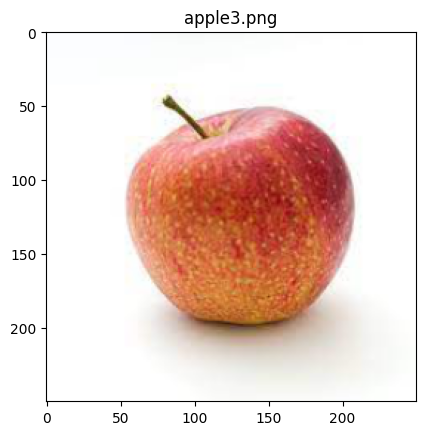

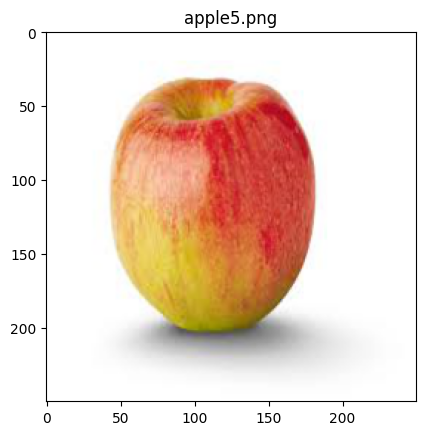

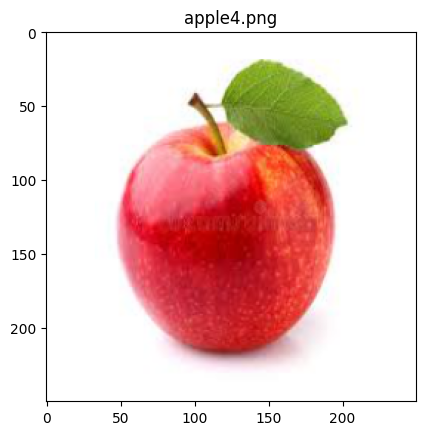

In [92]:

# Function to extract features from an image
def extract_features(image_path):

    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image
    resized = cv2.resize(gray, (480, 480))

    # Gabor filter
    ksize = 9
    sigma = 4.0
    theta = 1.0
    lambd = 4.0
    gamma = 0.5
    gabor = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma)
    filtered = cv2.filter2D(resized, cv2.CV_8UC3, gabor)

    # HOG feature
    fd, _ = hog(resized, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)

    # RGB histogram feature
    bins = 16
    hist = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    hist_flat = hist.flatten()

    # Daisy feature
    desc = daisy(resized, step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=False)
    descs = desc.reshape(desc.shape[0]*desc.shape[1], desc.shape[2])

    # Concatenate the feature vectors
    features = np.concatenate((filtered.flatten(), fd, hist_flat, descs.flatten()))

    return features

# Function to compare two images
def compare_images(image1_path, image2_path):

    # Extract features from the images
    features1 = extract_features(image1_path)
    features2 = extract_features(image2_path)


    # Compute the Euclidean distance between the feature vectors
    dist = euclidean(features1, features2)

    return dist

# Path to the directory containing the images
directory = r"C:\Users\Arunprasath Manickam\Desktop\cv\databases/"

# Path to the query image
query_path = r"C:\Users\Arunprasath Manickam\Desktop\cv\upload_folder\query_image.png"

# List to store the distances between the query image and the database images
distances = []

# Loop over the database images and compare them with the query image
for filename in os.listdir(directory):

    if filename.endswith('.png') :
    
        image_path = os.path.join(directory, filename)
        dist = compare_images(query_path, image_path)
        distances.append((filename, dist))

# Sort the distances in ascending order
distances.sort(key=lambda x: x[1])

for i in range(3):

    image_path = os.path.join( database_path , distances[i][0] )  
    
    image = cv2.imread( image_path )
    image = cv2.cvtColor( image , cv2.COLOR_BGR2RGB )
    image = cv2.resize(image , (250,250))
    
    plt.title(distances[i][0])
    plt.imshow(image)
    plt.show()
    
